![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 1:</b> <br>

a) Simule o modelo de neurônio por 3 s com um degrau de corrente I = 221 pA “ligada”
em t = 0,5 s e “desligada” em t = 2,5 s. Coloque os seus resultados em uma figura
composta por três gráficos, um dando a corrente aplicada I em função do tempo, outro
dando o potencial de membrana V em função do tempo, e o terceiro dando a corrente
de adaptação u em função do tempo. Faça com que os gráficos fiquem um em cima do
outro para facilitar a comparação.<br>
</div>

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=RuntimeWarning)

from AdEx import AdEx

100%|██████████| 3000/3000 [00:00<00:00, 37745.38it/s]


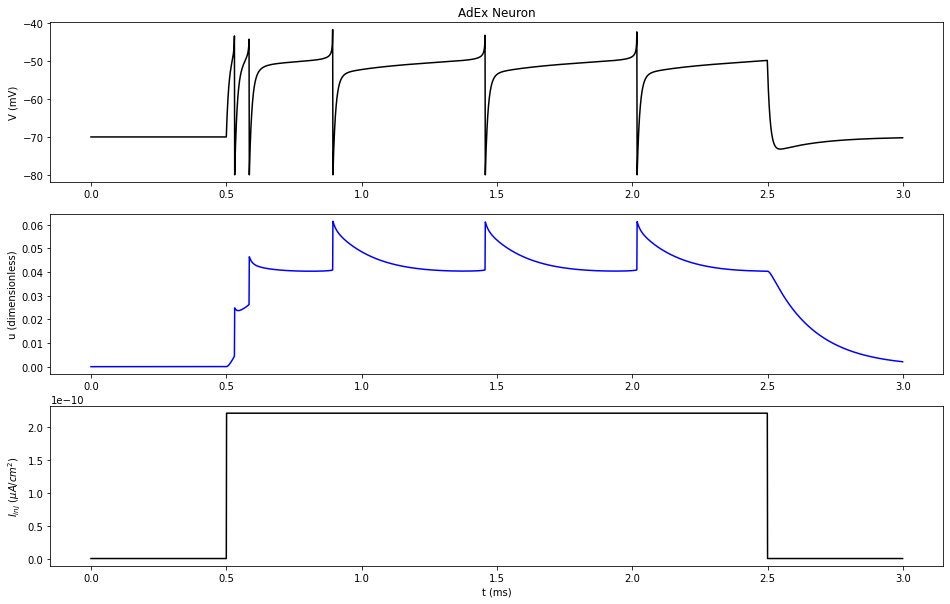

In [2]:
runner = AdEx(exp_time=3.0)
_ = runner.run(J=[221e-12], times=[(0.5, 2.5)])

<div style="font-family: Times New Roman; font-size: 1.0em;">

b) Agora simule o modelo por 5 s usando 20 valores diferentes de corrente constante injetada
I (a partir de t = 0). Use valores de I entre 200 e 500 pA. Para cada corrente aplicada,
calcule o primeiro intervalo entre disparos (T 1 = t 2 − t 1 na notação das notas de aula)
e o intervalo entre disparos do regime estacionário (T ∞ ). Faça um gráfico mostrando as
curvas f-I obtidas pelo inverso de T 1 (f 1 ) e pelo inverso de T ∞ (f ∞ ), representadas por
sı́mbolos ou cores diferentes.<br>
</div>

In [3]:
def calc_T1(spikes):
    if len(np.argwhere(spikes == 1)) < 2:
        return 0
    t1 = np.argwhere(spikes == 1)[0][0]
    t2 = np.argwhere(spikes == 1)[1][0]
    return t2 - t1

In [4]:
def calc_Tinf(spikes):
    if len(np.argwhere(spikes == 1)) < 2:
        return 0
    t1 = np.argwhere(spikes == 1)[-2][0]
    t2 = np.argwhere(spikes == 1)[-1][0]
    return t2 - t1

In [5]:
inj_values = np.arange(200e-12, 500e-12, 15e-12)

runner = AdEx(exp_time=5.0)

T1_all = []
Tinf_all = []

for i in inj_values:
    V, u, spikes, _ = runner.run(J=[i], times=[(0.5, 2.5)], plot=False)
    T1 = calc_T1(spikes)
    Tinf = calc_Tinf(spikes)

    if T1 != 0:
        T1 = 1 / T1

    if Tinf != 0:
        Tinf = 1 / Tinf

    T1_all.append(T1)
    Tinf_all.append(Tinf)

100%|██████████| 5000/5000 [00:00<00:00, 40563.24it/s]


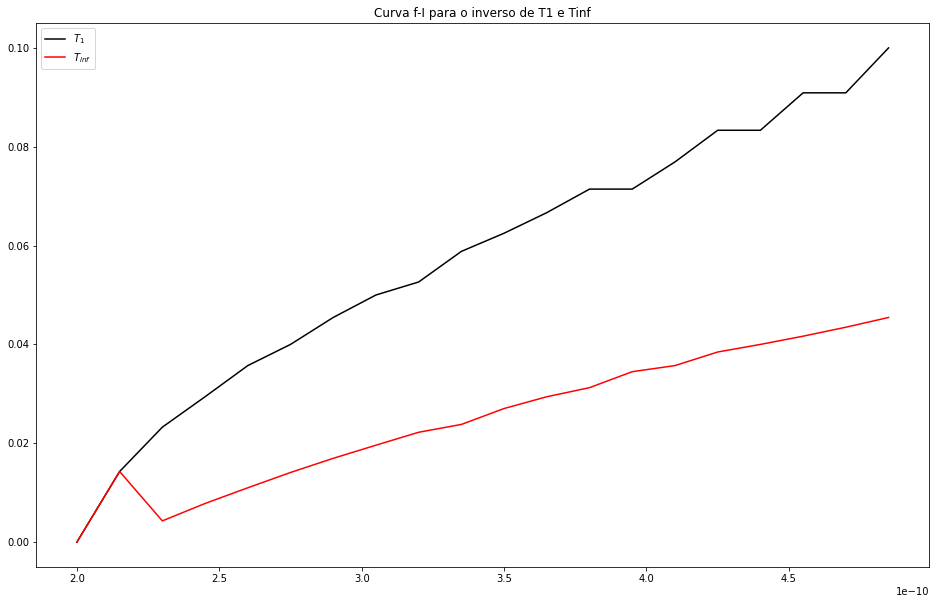

In [6]:
plt.figure(figsize=(16, 10))
plt.plot(inj_values, T1_all, "k", label="$T_{1}$")
plt.plot(inj_values, Tinf_all, "r", label="$T_{inf}$")
plt.legend()
plt.title("Curva f-I para o inverso de T1 e Tinf")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 2:</b> <br>

a) Escolha pelo menos três dos padrões de disparo listados na tabela do livro de Gerstner et
al. e use os valores dos parâmetros dados (incluindo o degrau de corrente I) para simular
o neurônio AdEx e tente replicar os padrões de disparo correspondentes mostrados na
Figura 6.2 do livro. Como Gerstner et al. não dão um valor de V pico em seu livro, use
V pico = 20 mV.<br>
</div>

In [7]:
spike_pattern = {
    "Tonic": {
        "Tm": 20e-3,
        "a": 0,
        "tau_u": 30e-3,
        "b": 60e-12,
        "v_init": -55e-3,
        "R": 500e6,
    },
    "Adapting": {
        "Tm": 20e-3,
        "a": 0,
        "tau_u": 100e-3,
        "b": 5e-12,
        "v_init": -55e-3,
        "R": 500e6,
    },
    "Bursting": {
        "Tm": 5e-3,
        "a": -0.5e-9,
        "tau_u": 100e-3,
        "b": 7e-12,
        "v_init": -46e-3,
        "R": 500e6,
    },
}

100%|██████████| 1000/1000 [00:00<00:00, 35747.92it/s]


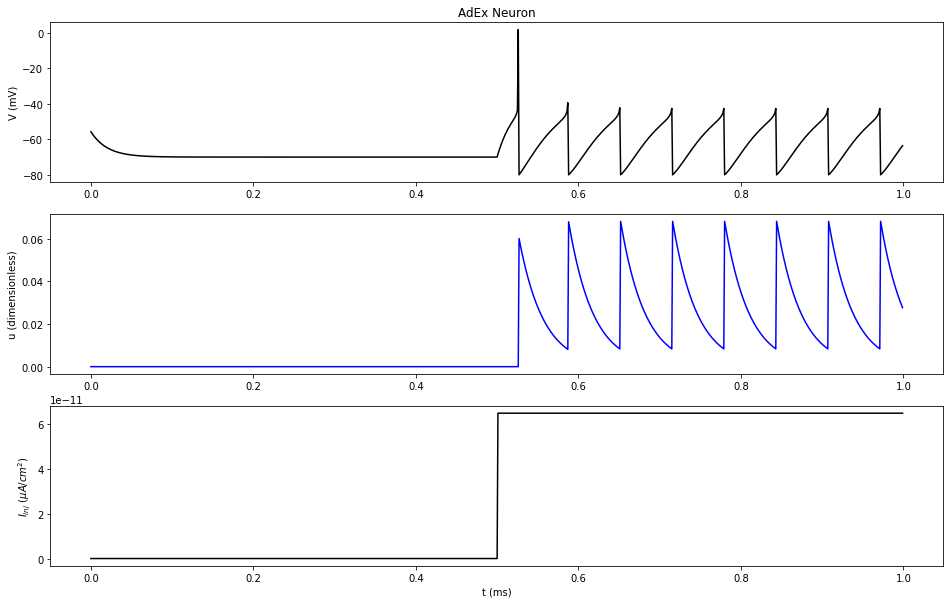

pattern: Tonic


100%|██████████| 1000/1000 [00:00<00:00, 37993.60it/s]


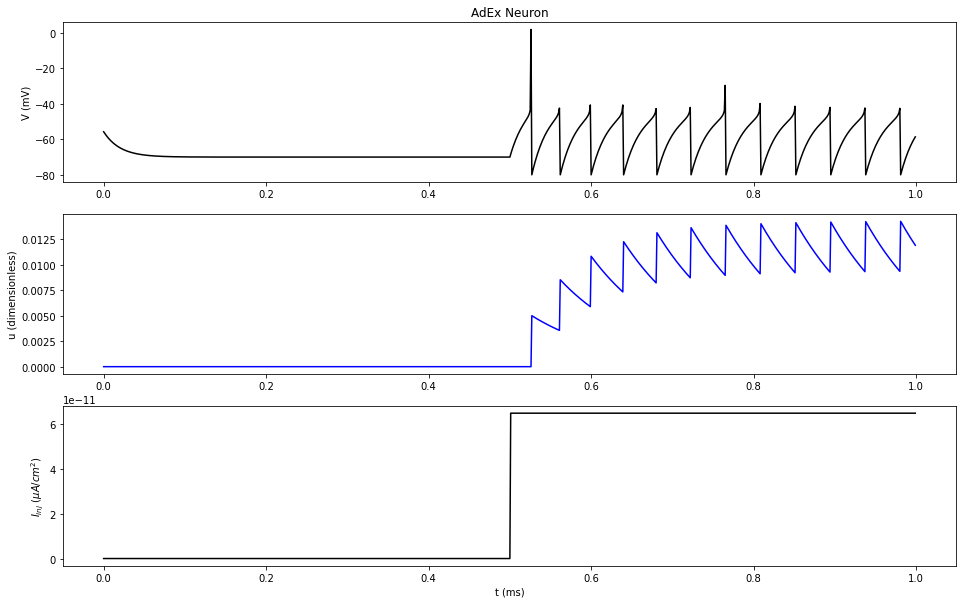

pattern: Adapting


100%|██████████| 1000/1000 [00:00<00:00, 40266.35it/s]


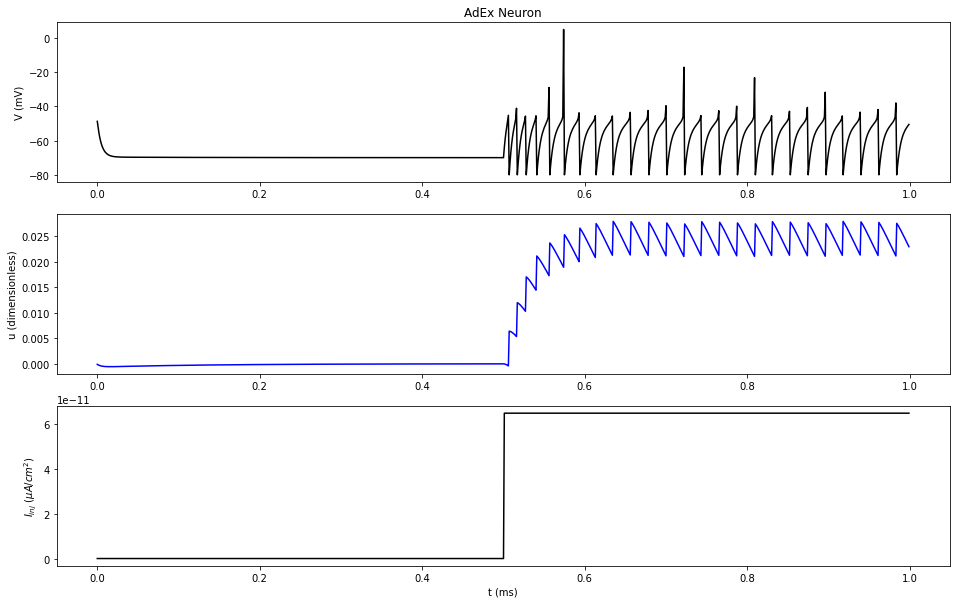

pattern: Bursting


In [8]:
for pattern, params in spike_pattern.items():
    C = params["Tm"] / params["R"]
    G = 1 / params["R"]
    a = params["a"]
    b = params["b"]
    tau_u = params["tau_u"]
    v_init = params["v_init"]

    runner = AdEx(exp_time=1.0, C=C, G=G, V_pico=20e-3, a=a, b=b, tau_u=tau_u)
    X = runner.run(J=[65e-12], V_init=v_init, times=[(0.5, 2.5)])
    print(f"pattern: {pattern}")

<div style="font-family: Times New Roman; font-size: 1.0em;">

b) Para pelo menos um dos padrões de disparo simulados no item anterior, faça uma análise
completa do sistema no plano de fase.<br>

(i) Para I = 0, trace as nulclinas de V e u no plano de fase e determine os pontos
fixos e seus tipos de estabilidade (retrato de fase do sistema). Escolha um valor
de pulso de corrente I = δI suficiente para gerar um potencial de ação e mostre a
trajetória correspondente no plano de fase. Faça também gráficos de V × t e u × t
mostrando o comportamento temporal de V e u provocado pelo pulso. <br>
</div>

In [9]:
from AdExnullclines import plot_phase_diagram

In [10]:
params = {
    "G": 1 / 500e6,
    "V_r": -0.07,
    "delta_L": 0.002,
    "V_L": -0.05,
    "a": -0.5e-9,
    "I": 21e-12,
}

100%|██████████| 1000/1000 [00:00<00:00, 44014.36it/s]


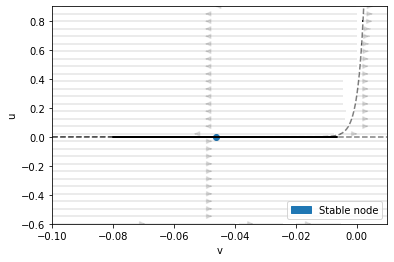

In [11]:
plot_phase_diagram(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">
(ii) Escolha um degrau de corrente constante injetada I (diferente do usado no item
(a) acima) que produza disparos no neurônio e faça um gráfico do plano de fase
mostrando a nulclina de u e a nova posição da nulclina de V , identificando os
pontos fixos e seus tipos de estabilidade (retrato de fase). Mostre a trajetória do
sistema no plano de fase, identificando os pontos de redefinição do sistema após os
disparos. Gere gráficos de V × t e u × t correspondentes ao caso estudado. <br>
</div>

In [12]:
params = {
    "G": 1 / 500e6,
    "V_r": -0.07,
    "delta_L": 0.002,
    "V_L": -0.05,
    "a": -0.5e-9,
    "I": 65e-12,
}

100%|██████████| 1000/1000 [00:00<00:00, 43100.73it/s]


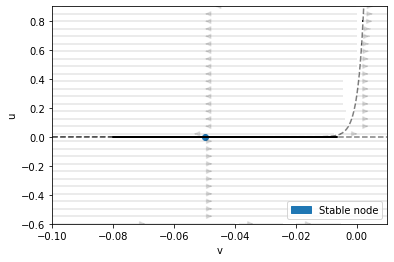

In [13]:
plot_phase_diagram(params)

In [14]:
params = {
    "Tm": 5e-3,
    "tau_u": 100e-3,
    "b": 7e-12,
    "v_init": -46e-3,
    "R": 500e6,
    "G": 1 / 500e6,
    "V_r": -0.07,
    "delta_L": 0.002,
    "V_L": -0.05,
    "a": -0.5e-9,
    "I": 65e-12,
}

100%|██████████| 2000/2000 [00:00<00:00, 38686.24it/s]


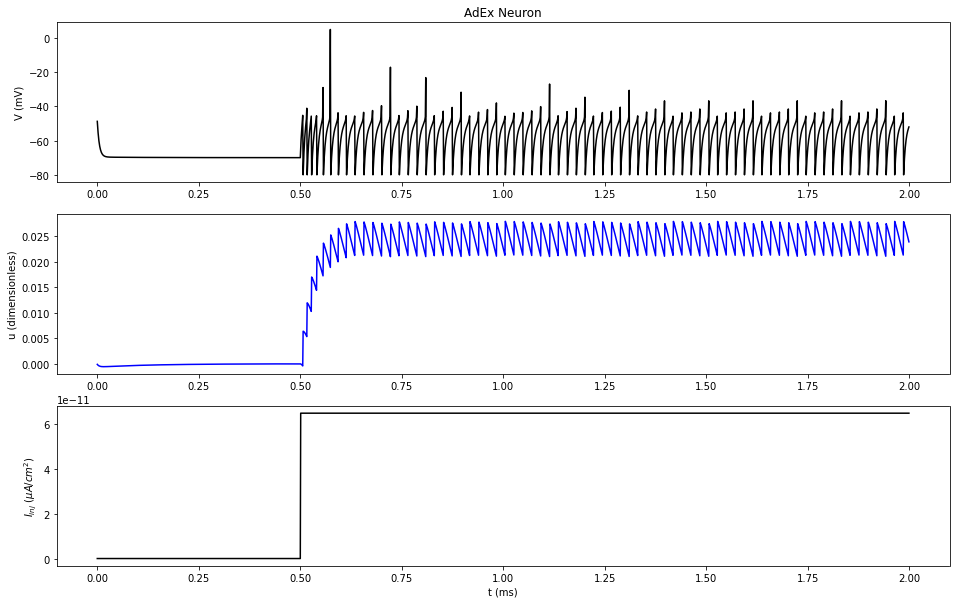

In [15]:
C = params["Tm"] / params["R"]
G = 1 / params["R"]
a = params["a"]
b = params["b"]
tau_u = params["tau_u"]
v_init = params["v_init"]

runner = AdEx(C=C, G=G, V_pico=20e-3, a=a, b=b, tau_u=tau_u)
X = runner.run(J=[params["I"]], V_init=v_init, times=[(0.5, 2)])

<div style="font-family: Times New Roman; font-size: 1.0em;">
(iii) Explique, em suas próprias palavras, os comportamentos observados nos itens (i)
e (ii). <br>

Podemos observar que em ambos os items o comportamento do sistema no plano de fase é o mesmo.

A currente injetada é capaz de produzir disparos e as variáveis u e v mantem-se no eixo x do plano de fase. 

</div>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 3:</b> <br>

a) Use os seguintes valores para os parâmetros das equações (4), (5) e (6): C = 150 pF,
v r = −75 mV, v L = −45 mV, k = 1,2, a = 0,01, b = 5, c = −56 mV, d = 130 e v pico = 50
mV.<br>

(i) Faça I = 0 e determine o retrato de fase do sistema, contendo as nulclinas de v e
u, seus pontos fixos e correspondentes tipos de estabilidade.<br>
</div>

In [16]:
from Izhikevich import Izhikevich
from Izhikevichnullclines import IzhikevichNullclines

In [17]:
params = {"k": 1.2, "a": 0.01, "b": 5, "V_r": -75, "V_L": -45, "I": 0}

100%|██████████| 500/500 [00:00<00:00, 60433.17it/s]


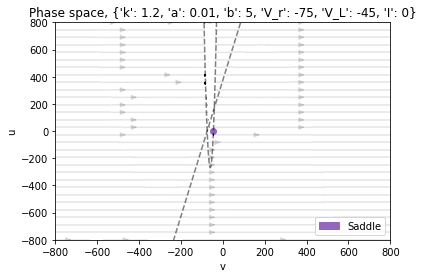

In [18]:
izhikevich_null = IzhikevichNullclines(params)
izhikevich_null.plot_phase_diagram_Izhi(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">

(ii) Simule o modelo por 500 ms com um pulso quadrado de corrente I aplicado de 20
ms a 450 ms. Use quatro valores de I: 300 pA, 370 pA, 500 pA e 550 pA. Faça o
seu programa gerar uma figura com quatro gráficos de voltagem versus tempo, um
para cada valor de I.<br>
</div>

100%|██████████| 500/500 [00:00<00:00, 46309.06it/s]


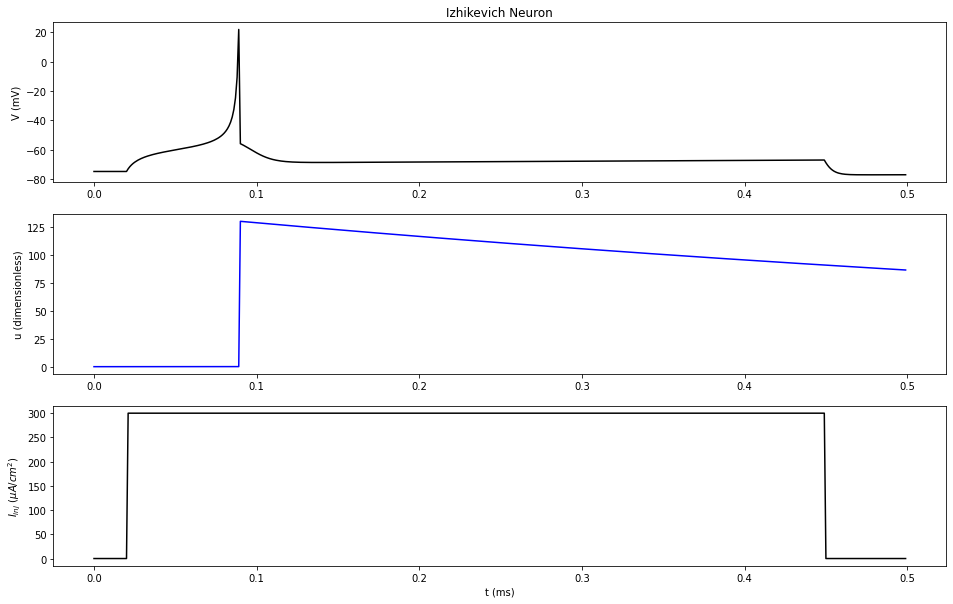

I = 300


100%|██████████| 500/500 [00:00<00:00, 55649.52it/s]


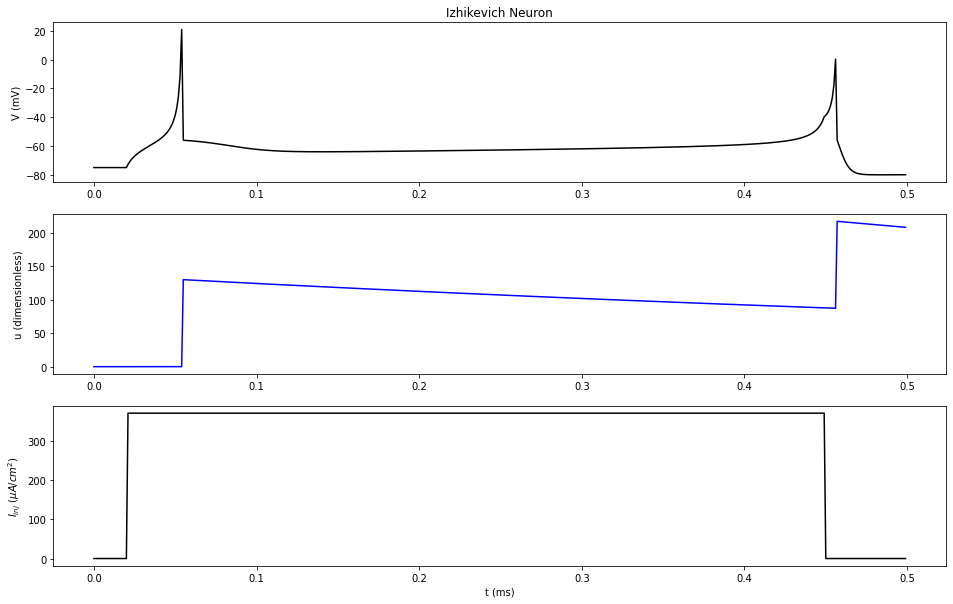

I = 370


100%|██████████| 500/500 [00:00<00:00, 55468.47it/s]


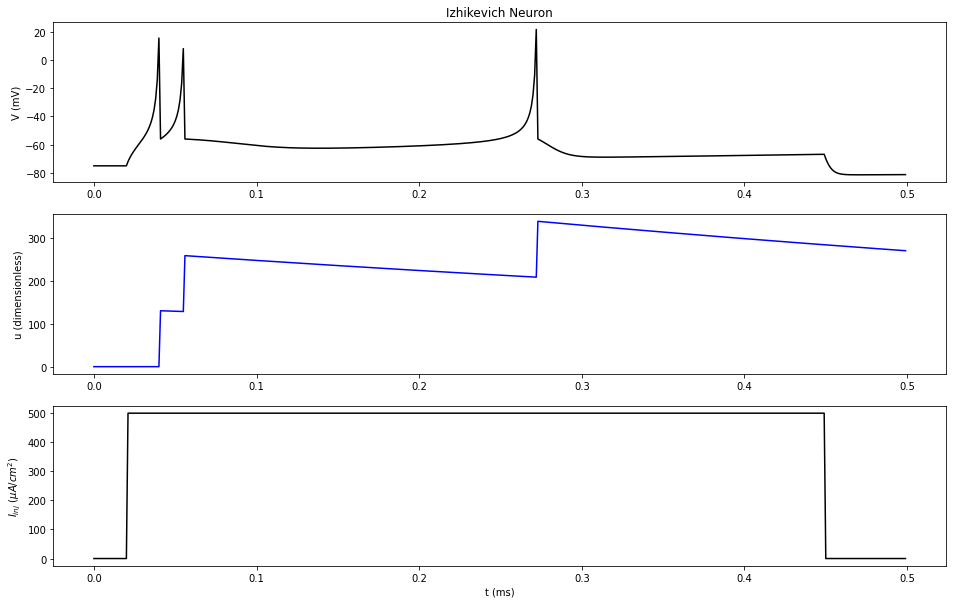

I = 500


100%|██████████| 500/500 [00:00<00:00, 47019.24it/s]


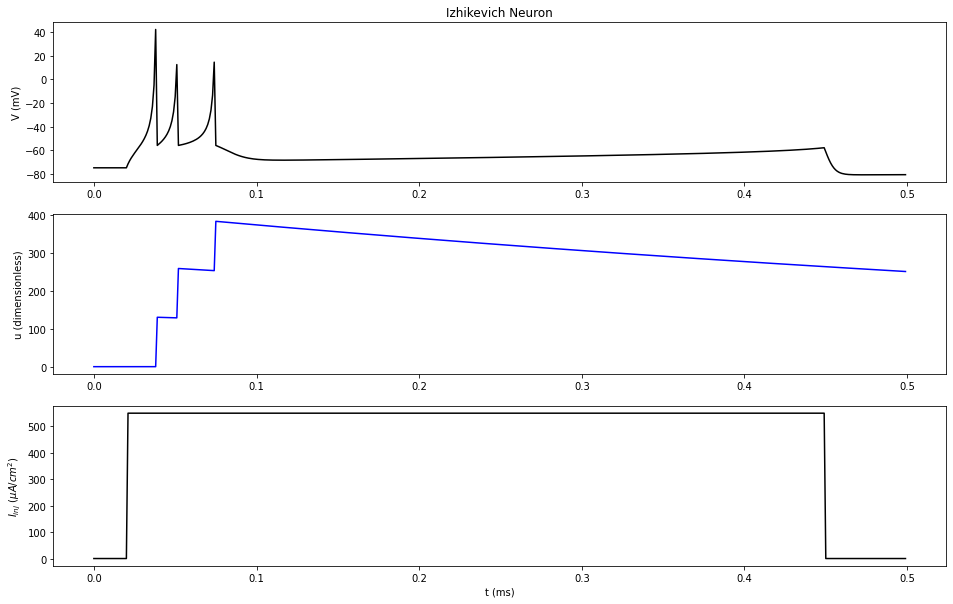

I = 550


In [19]:
inj_values = [300, 370, 500, 550]

runner = Izhikevich(exp_time=0.5)

for i in inj_values:
    _ = runner.run(J=[i], times=[(0.02, 0.45)])
    print(f"I = {i}")

<div style="font-family: Times New Roman; font-size: 1.0em;">

(iii) Para cada um dos casos simulados no item anterior, construa o retrato de fase
do sistema, identificando as nulclinas de v e u, os pontos fixos e seus tipos de
estabilidade, mostrando a trajetória do sistema e os pontos de redefinição.<br>
</div>

100%|██████████| 500/500 [00:00<00:00, 57862.05it/s]


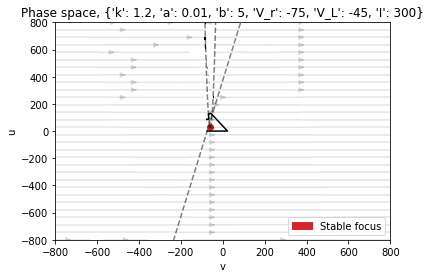

100%|██████████| 500/500 [00:00<00:00, 60116.15it/s]


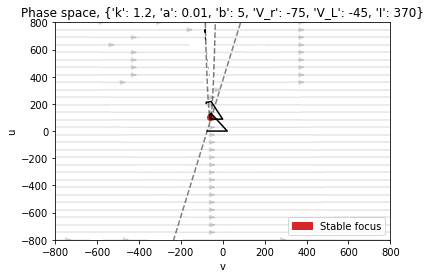

100%|██████████| 500/500 [00:00<00:00, 56297.87it/s]


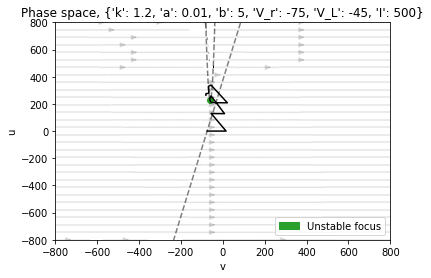

100%|██████████| 500/500 [00:00<00:00, 60488.95it/s]


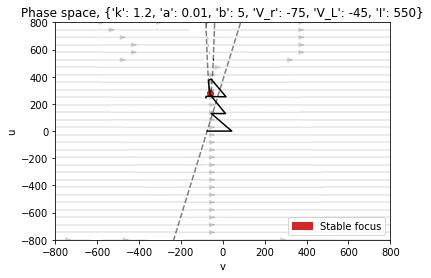

In [20]:
for i in inj_values:
    params["I"] = i
    IzhichNull = IzhikevichNullclines(params)
    IzhichNull.plot_phase_diagram_Izhi(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">

(iv) Explique os comportamentos de disparos observados usando os retratos de fase
construı́dos.<br>

Podemos observar que a medida que a corrente aumenta, a quantidade de disparos também. Além disso, podemos notar que o tipo do ponto de equilibrio muda de acordo com a corrente aplicada, fazendo com que o comportamento da taxa de disparos siga a forma do primeiro disparo.
</div>

<div style="font-family: Times New Roman; font-size: 1.0em;">

b) Use agora os seguintes valores para os parâmetros das equações (4), (5) e (6): C = 50
pF, v r = −60 mV, v L = −40 mV, k = 1,5, a = 0,03, b = 1, c = −40 mV, d = 150 e
v pico = 25 mV.<br>

(i) Faça I = 0 e determine o retrato de fase do sistema, contendo as nulclinas de v e
u, seus pontos fixos e correspondentes tipos de estabilidade.<br>
</div>

In [21]:
params = {"k": 1.5, "a": 0.03, "b": 1, "V_r": -60, "V_L": -40, "I": 0}

100%|██████████| 500/500 [00:00<00:00, 56388.70it/s]


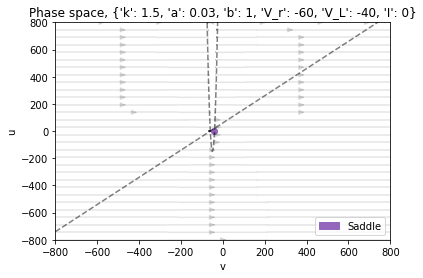

In [22]:
IzhichNull = IzhikevichNullclines(params, C=50e-3, c=-40, d=150, V_pico=25)
IzhichNull.plot_phase_diagram_Izhi(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">

(ii) Simule o modelo por 500 ms com um pulso quadrado de corrente I aplicado de 20
ms a 450 ms. Use quatro valores de I: 200 pA, 300 pA, 400 pA e 500 pA. Faça o
seu programa gerar uma figura com quatro gráficos de voltagem versus tempo, um
para cada valor de I.<br>
</div>

100%|██████████| 500/500 [00:00<00:00, 51868.62it/s]


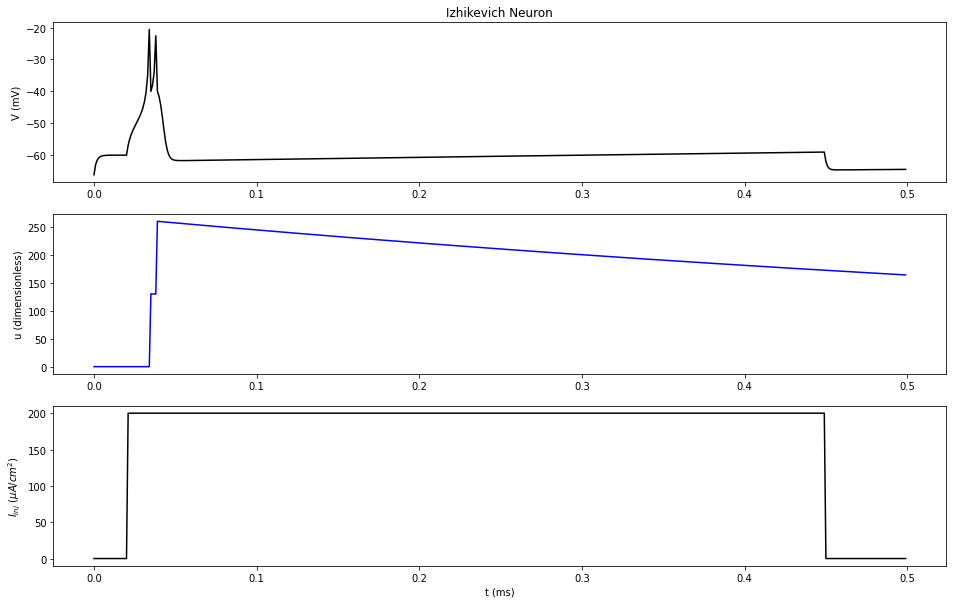

I = 200


100%|██████████| 500/500 [00:00<00:00, 53256.95it/s]


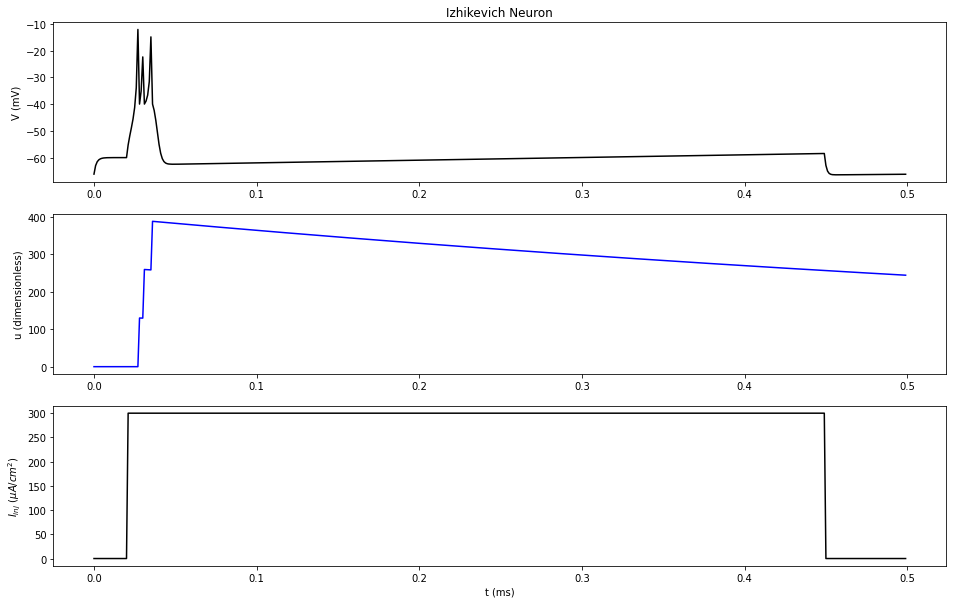

I = 300


100%|██████████| 500/500 [00:00<00:00, 52698.88it/s]


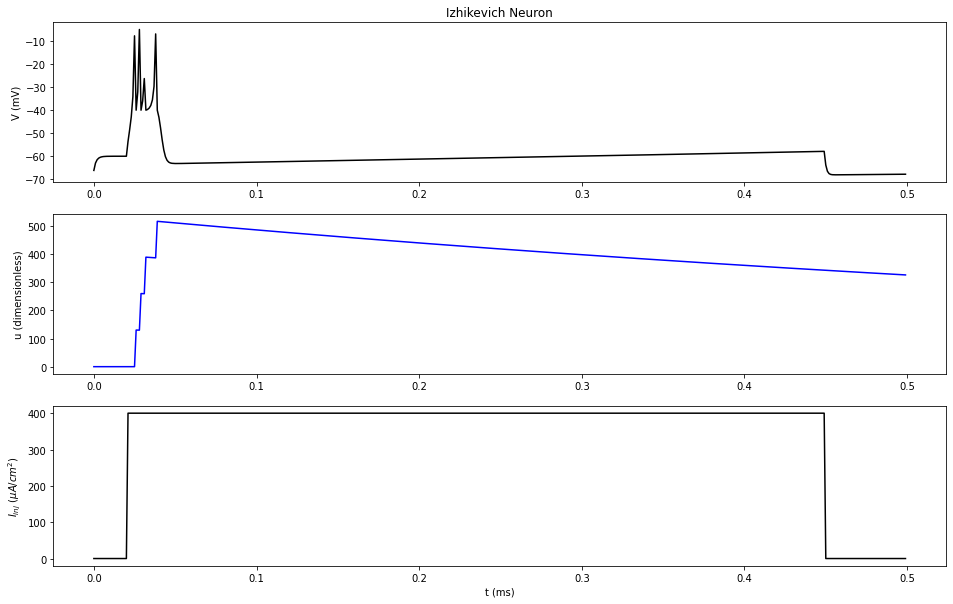

I = 400


100%|██████████| 500/500 [00:00<00:00, 54470.07it/s]


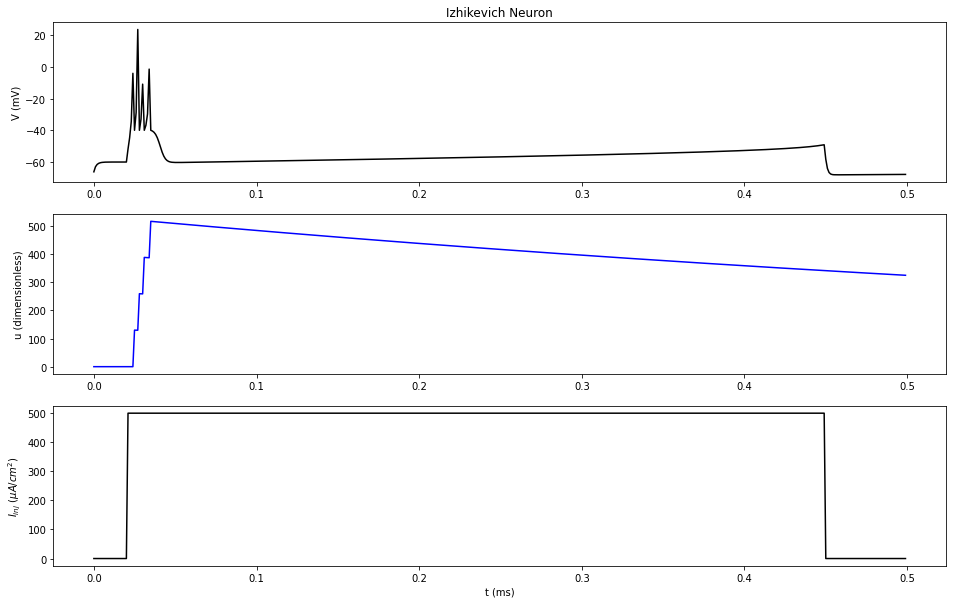

I = 500


In [23]:
inj_values = [200, 300, 400, 500]

runner = Izhikevich(
    C=50e-3, V_r=-60, V_L=-40, k=1.5, a=0.03, b=1, c=-40, V_pico=25, exp_time=0.5
)

for i in inj_values:
    _ = runner.run(J=[i], times=[(0.02, 0.45)])
    print(f"I = {i}")

<div style="font-family: Times New Roman; font-size: 1.0em;">

(iii) Para cada um dos casos simulados no item anterior, construa o retrato de fase
do sistema, identificando as nulclinas de v e u, os pontos fixos e seus tipos de
estabilidade, mostrando a trajetória do sistema e os pontos de redefinição.<br>
</div>

100%|██████████| 500/500 [00:00<00:00, 60816.98it/s]


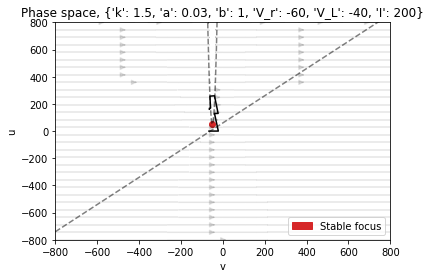

100%|██████████| 500/500 [00:00<00:00, 58141.17it/s]


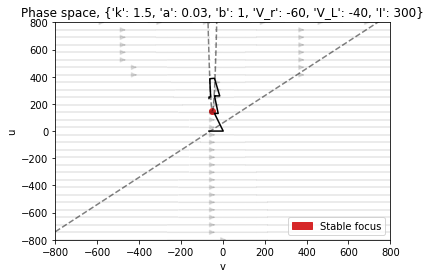

100%|██████████| 500/500 [00:00<00:00, 59763.24it/s]


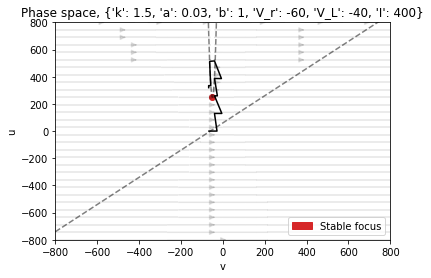

100%|██████████| 500/500 [00:00<00:00, 59566.34it/s]


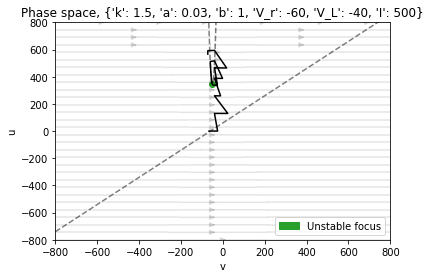

In [24]:
for i in inj_values:
    params["I"] = i
    IzhichNull = IzhikevichNullclines(params, C=50e-3, c=-40, d=150, V_pico=25)
    IzhichNull.plot_phase_diagram_Izhi(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">

(iv) Explique os comportamentos de disparos observados usando os retratos de fase
construı́dos.<br>

Podemos observar algo similar ao que ocorreu na parte a) desta questão. Porém com estes parâmetros o comportamento de disparos se assemelha com neurônios do tipo IB ou TC.
</div>

<div style="font-family: Times New Roman; font-size: 1.0em;">

c) Como terceiro exemplo de neurônio de Izhikevich, vamos considerar uma variante do
modelo em que a equação para u possui uma dependência cúbica com v e não existe
redefinição de u após um disparo:<br>

Use os seguintes valores para os parâmetros das equações (7), (8) e (9): C = 25 pF,
v r = −50 mV, v L = −30 mV, k = 1, a = 0,5, b = 25, p = 0,009, c = −40 mV e
v pico = 10 mV. Use como valores iniciais v(0) = v r e u(0) = 0. <br>

(i) Faça I = 0 e determine o retrato de fase do sistema, contendo as nulclinas de v e
u, seus pontos fixos e correspondentes tipos de estabilidade.<br>
</div>

In [25]:
from Izhikevich_mod import Izhikevich
from Izhikevich_modnullclines import IzhikevichNullclines

100%|██████████| 500/500 [00:00<00:00, 49398.22it/s]


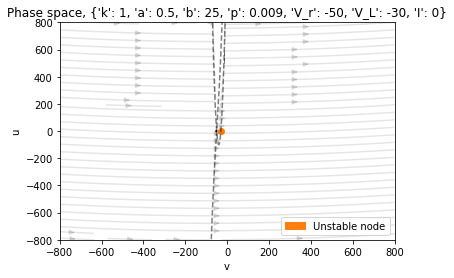

In [26]:
params = {"k": 1, "a": 0.5, "b": 25, "p": 0.009, "V_r": -50, "V_L": -30, "I": 0}

Izhinull = IzhikevichNullclines(params, C=25e-3, c=-40, V_pico=10)
Izhinull.plot_phase_diagram_Izhi(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">

(ii)Simule o modelo por 200 ms com um pulso quadrado de corrente I aplicado de 20
ms a 180 ms. Use cinco valores de I: 200 pA, 400 pA, 470 pA, 500 pA e 600 pA.
Faça o seu programa gerar uma figura com os cinco gráficos de voltagem versus
tempo, um para cada valor de I.<br>
</div>

100%|██████████| 200/200 [00:00<00:00, 42888.74it/s]


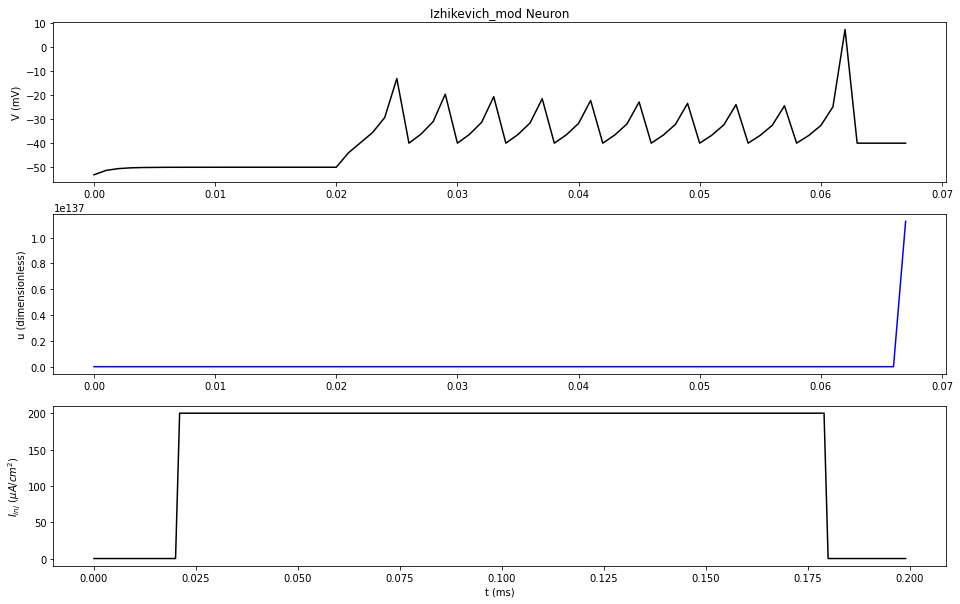

I = 200


100%|██████████| 200/200 [00:00<00:00, 39162.50it/s]


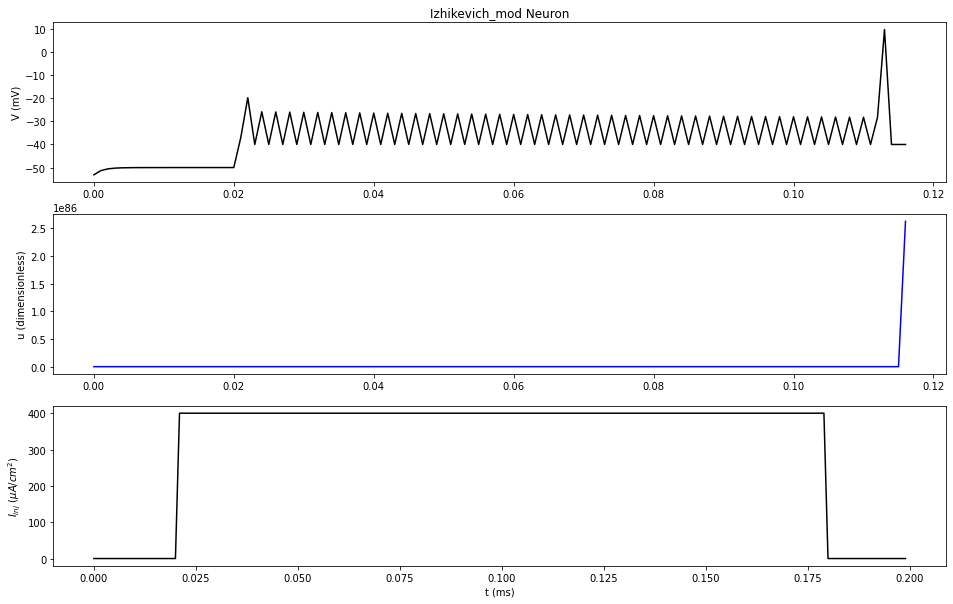

I = 400


100%|██████████| 200/200 [00:00<00:00, 43615.70it/s]


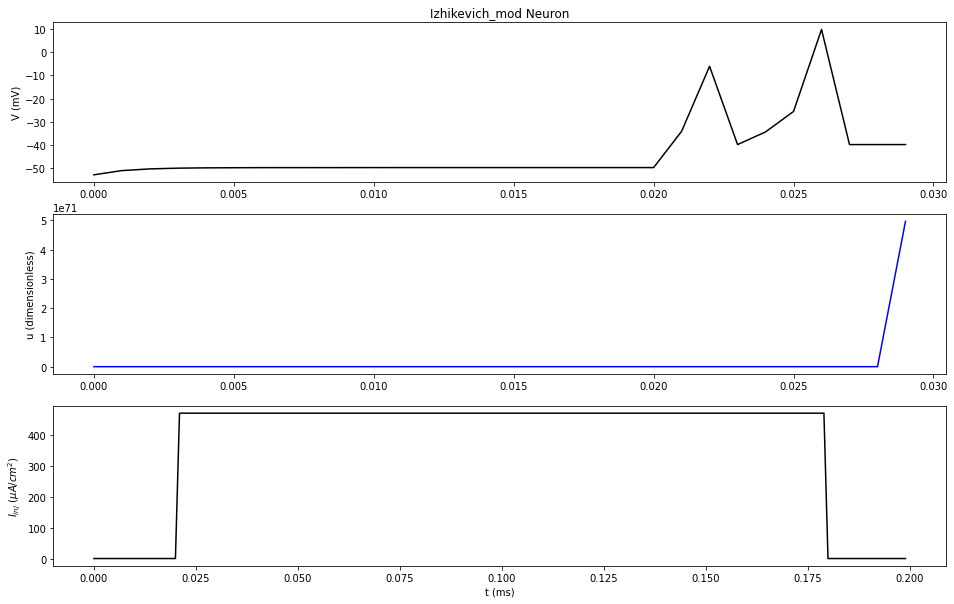

I = 470


100%|██████████| 200/200 [00:00<00:00, 44933.35it/s]


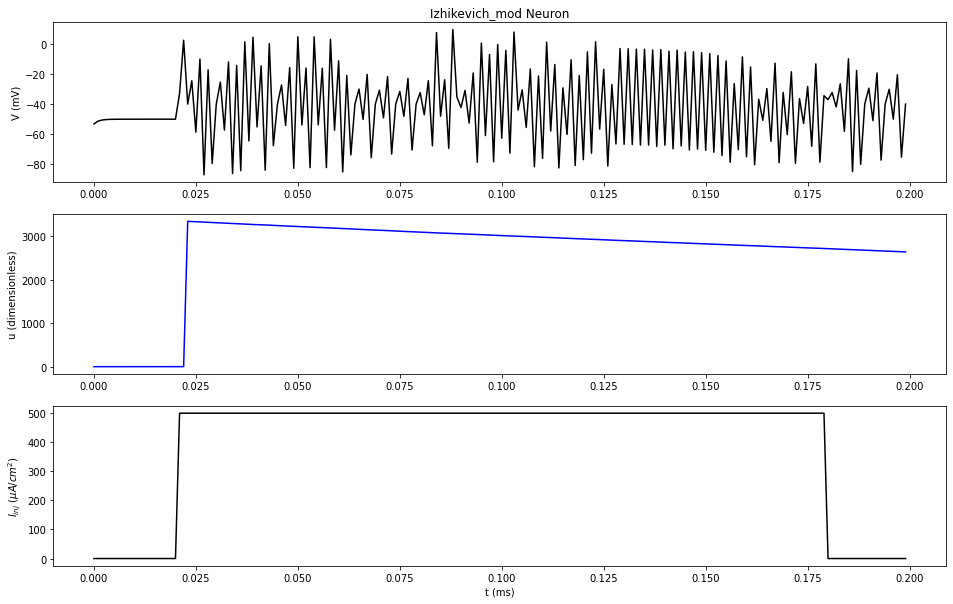

I = 500


100%|██████████| 200/200 [00:00<00:00, 42392.40it/s]


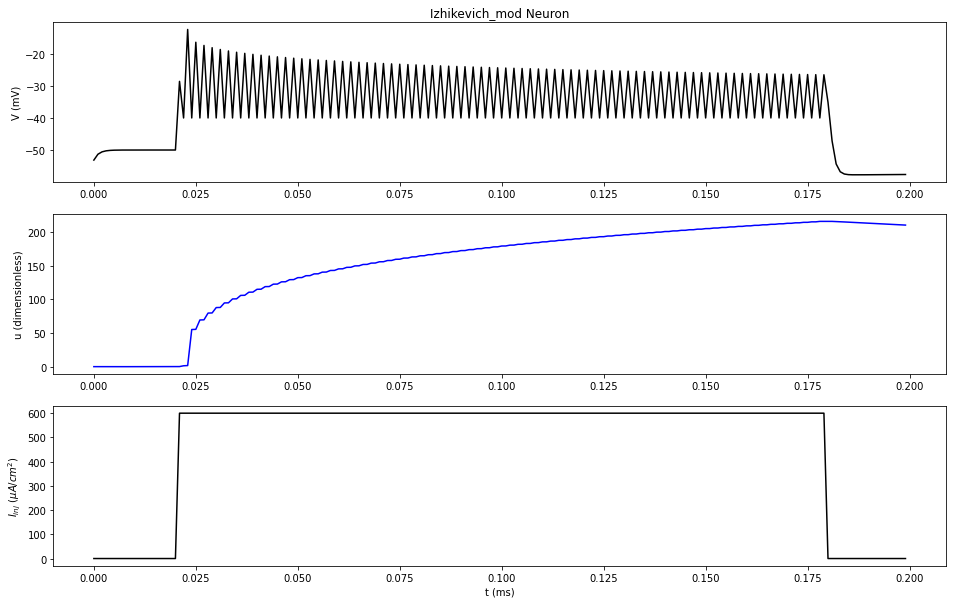

I = 600


In [27]:
inj_values = [200, 400, 470, 500, 600]

for i in inj_values:
    params["I"] = i
    Izhimod = Izhikevich(exp_time=0.2)
    Izhimod.run(J=[i], times=[(0.02, 0.18)])
    print(f"I = {i}")

<div style="font-family: Times New Roman; font-size: 1.0em;">

(iii) Para cada um dos casos simulados no item anterior, construa o retrato de fase
do sistema, identificando as nulclinas de v e u, os pontos fixos e seus tipos de
estabilidade, mostrando a trajetória do sistema e os pontos de redefinição.<br>
</div>

100%|██████████| 500/500 [00:00<00:00, 48495.79it/s]


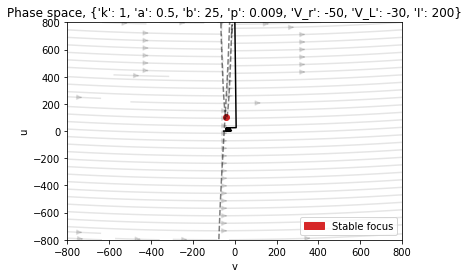

100%|██████████| 500/500 [00:00<00:00, 48496.91it/s]


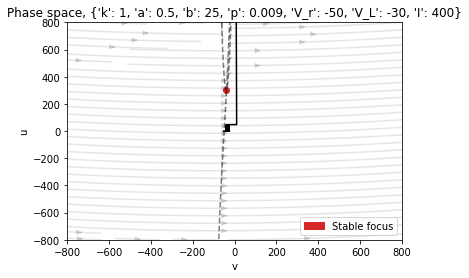

100%|██████████| 500/500 [00:00<00:00, 48859.61it/s]


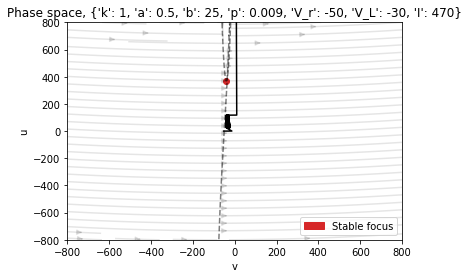

100%|██████████| 500/500 [00:00<00:00, 49767.48it/s]


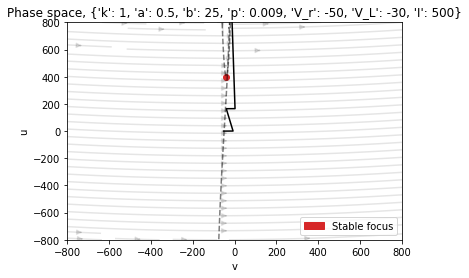

100%|██████████| 500/500 [00:00<00:00, 50763.75it/s]


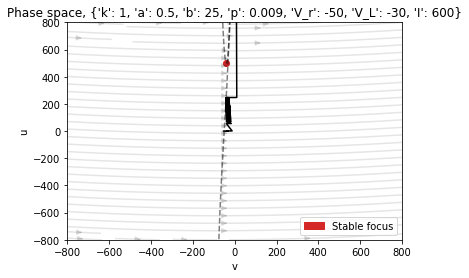

In [28]:
for i in inj_values:
    params["I"] = i
    IzhichNull = IzhikevichNullclines(params, C=25e-3, c=-40, V_pico=10)
    IzhichNull.plot_phase_diagram_Izhi(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">

(iv) Explique os comportamentos de disparos observados usando os retratos de fase
construı́dos.<br>

Bem como nos dois momentos anteriores, podemos observar algo similar ao que ocorreu na parte a) e b) desta questão. <br>
Porém agora, com estes parâmetros o comportamento de disparos se assemelha com neurônios do tipo RS, TC ou FS.
</div>